In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("book (1).csv")

# EDA and data visualization

In [3]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
data.shape

(2000, 11)

In [6]:
for i in data.columns:
    print(i)
    print(data[i].value_counts()) 
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



In [7]:
book = []
for i in data.columns:
    book.append({'Items': i, 'counts': data[i].value_counts()[1]})
book = pd.DataFrame(book)
book.sample(2)

,Items,counts
2,CookBks,862
5,ArtBks,482


<AxesSubplot:xlabel='Items'>

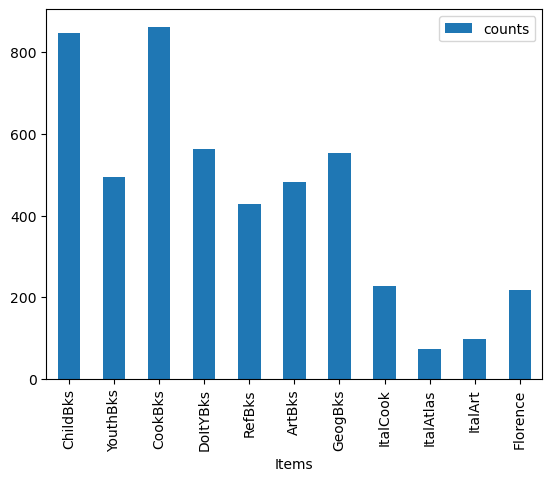

In [8]:
book.plot.bar(x = 'Items', y = 'counts')

# Apriori algorithm

In [9]:
from mlxtend.frequent_patterns import apriori,association_rules

#### finding which books are bought together
#### 1. Association rules with 10% Support and 70% confidence

In [10]:
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets

C:\Users\Administrator\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [11]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.7)
print(rules)

           antecedents         consequents  antecedent support  \
0           (ChildBks)          (YouthBks)              0.4230   
1           (YouthBks)          (ChildBks)              0.2475   
2            (CookBks)          (ChildBks)              0.4310   
3           (ChildBks)           (CookBks)              0.4230   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, GeogBks)           (CookBks)              0.1275   
96  (CookBks, GeogBks)            (ArtBks)              0.1925   
97            (ArtBks)  (CookBks, GeogBks)              0.2410   
98           (CookBks)   (ArtBks, GeogBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
1               0.4230   0.1650    0.666667  1.5760

In [12]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


<AxesSubplot:>

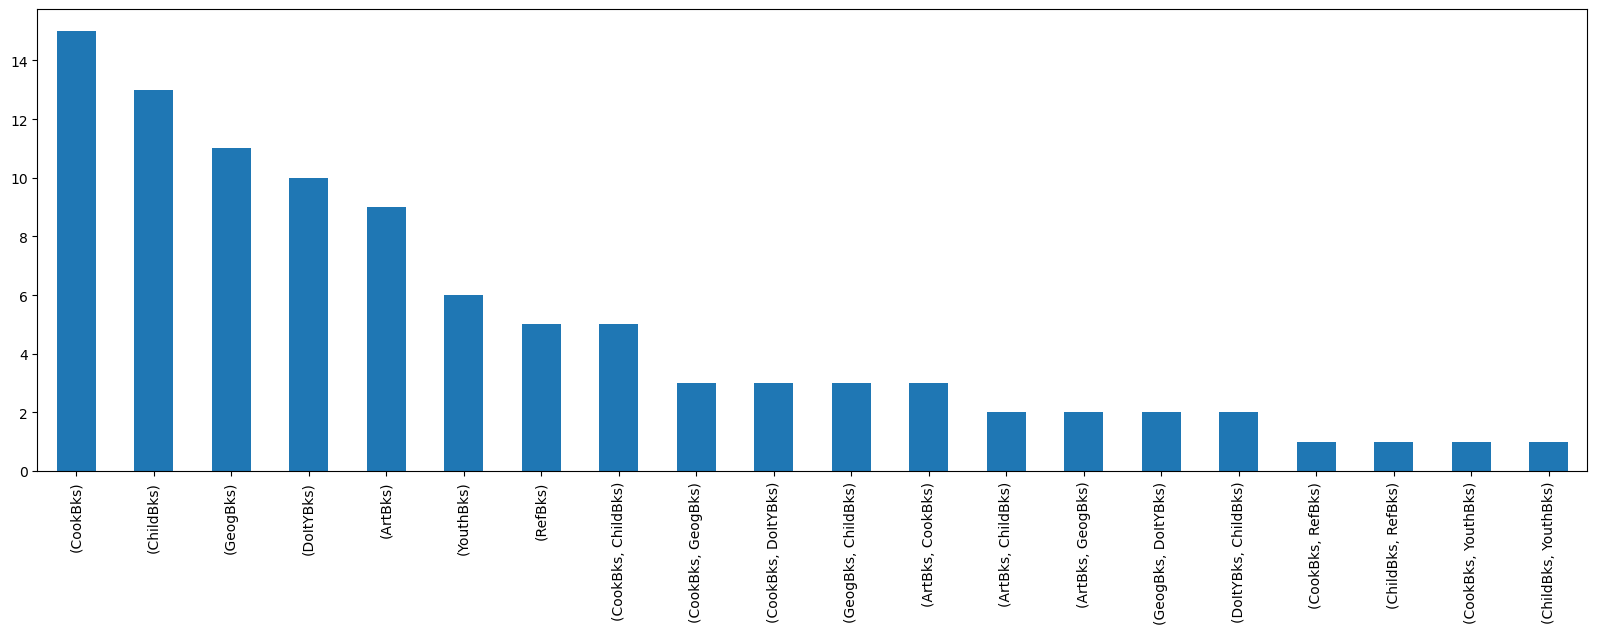

In [13]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='support', ylabel='confidence'>

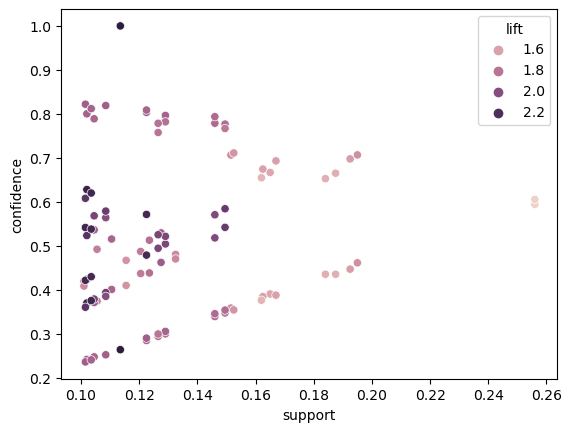

In [14]:
conf = rules['confidence']
supp = rules['support']
sns.scatterplot(supp, conf, hue = rules['lift'])

#### 2. Association rules with 15% Support and 80% confidence

In [15]:
frequent_itemsets = apriori(data, min_support = 0.15, use_colnames=True)
print(frequent_itemsets)

    support              itemsets
0    0.4230            (ChildBks)
1    0.2475            (YouthBks)
2    0.4310             (CookBks)
3    0.2820            (DoItYBks)
4    0.2145              (RefBks)
5    0.2410              (ArtBks)
6    0.2760             (GeogBks)
7    0.1650  (ChildBks, YouthBks)
8    0.2560   (CookBks, ChildBks)
9    0.1840  (DoItYBks, ChildBks)
10   0.1515    (ChildBks, RefBks)
11   0.1625    (ArtBks, ChildBks)
12   0.1950   (GeogBks, ChildBks)
13   0.1620   (CookBks, YouthBks)
14   0.1875   (CookBks, DoItYBks)
15   0.1525     (CookBks, RefBks)
16   0.1670     (ArtBks, CookBks)
17   0.1925    (CookBks, GeogBks)


C:\Users\Administrator\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.8)
print(rules)

   antecedents consequents  antecedent support  consequent support  support  \
0   (ChildBks)  (YouthBks)              0.4230              0.2475   0.1650   
1   (YouthBks)  (ChildBks)              0.2475              0.4230   0.1650   
2    (CookBks)  (ChildBks)              0.4310              0.4230   0.2560   
3   (ChildBks)   (CookBks)              0.4230              0.4310   0.2560   
4   (DoItYBks)  (ChildBks)              0.2820              0.4230   0.1840   
5   (ChildBks)  (DoItYBks)              0.4230              0.2820   0.1840   
6   (ChildBks)    (RefBks)              0.4230              0.2145   0.1515   
7     (RefBks)  (ChildBks)              0.2145              0.4230   0.1515   
8     (ArtBks)  (ChildBks)              0.2410              0.4230   0.1625   
9   (ChildBks)    (ArtBks)              0.4230              0.2410   0.1625   
10   (GeogBks)  (ChildBks)              0.2760              0.4230   0.1950   
11  (ChildBks)   (GeogBks)              0.4230      

In [17]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


<AxesSubplot:>

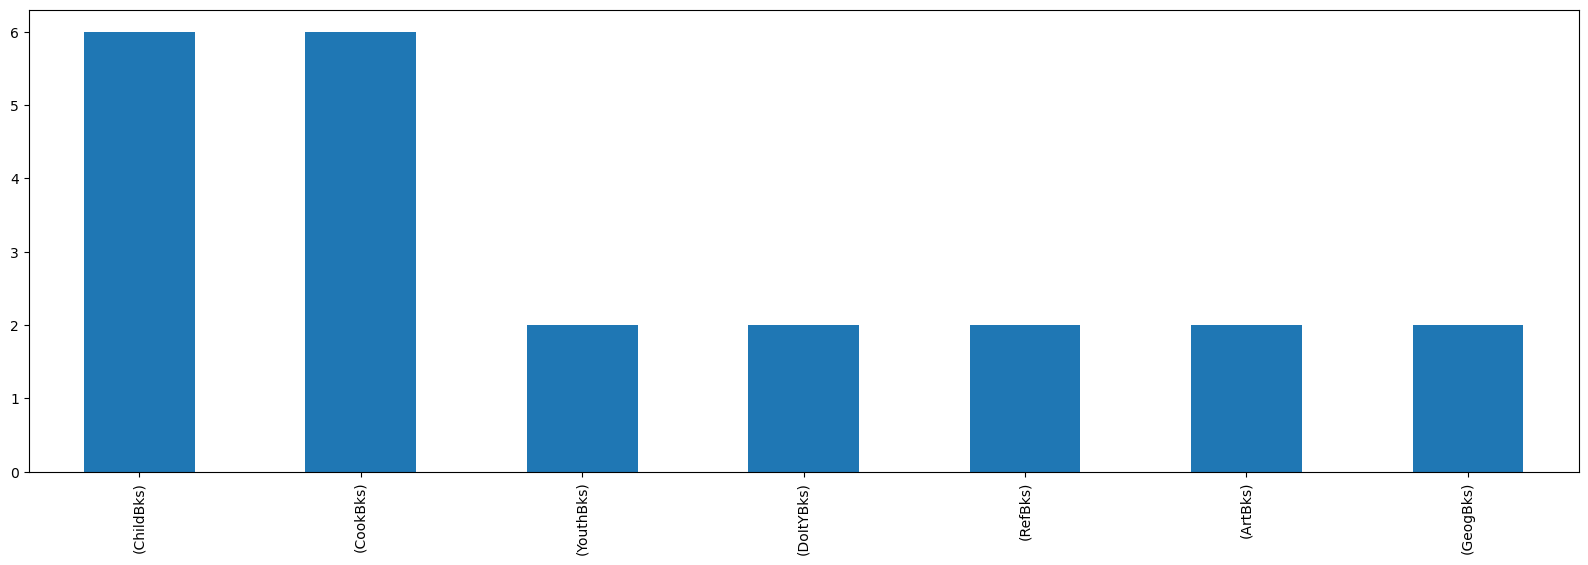

In [18]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='support', ylabel='confidence'>

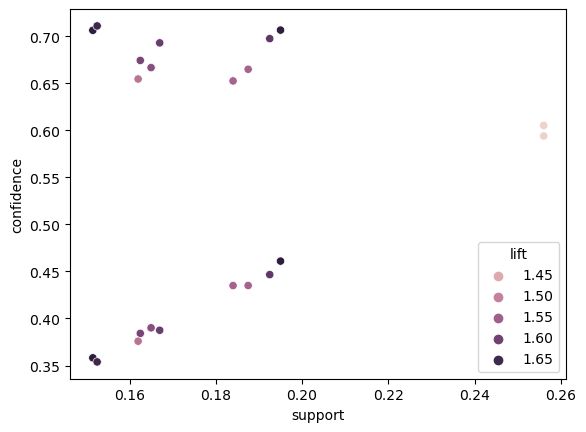

In [19]:
conf = rules['confidence']
supp = rules['support']
sns.scatterplot(supp, conf, hue = rules['lift'])

#### from above we can see by increasing the min_support value, frequency of books bought are getting reduced
So, Setting Min_support as 10% and frequency as 60%


In [20]:
frequent_itemsets = apriori(data, min_support = 0.1, use_colnames=True)
print(frequent_itemsets)

    support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (ChildBks, YouthBks)
10   0.2560            (CookBks, ChildBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (CookBks, YouthBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (CookBks, DoItYBks)
20   0.1525              (CookBks, RefBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925

C:\Users\Administrator\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.6)
print(rules)

           antecedents         consequents  antecedent support  \
0           (ChildBks)          (YouthBks)              0.4230   
1           (YouthBks)          (ChildBks)              0.2475   
2            (CookBks)          (ChildBks)              0.4310   
3           (ChildBks)           (CookBks)              0.4230   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, GeogBks)           (CookBks)              0.1275   
96  (CookBks, GeogBks)            (ArtBks)              0.1925   
97            (ArtBks)  (CookBks, GeogBks)              0.2410   
98           (CookBks)   (ArtBks, GeogBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
1               0.4230   0.1650    0.666667  1.5760

In [22]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


<AxesSubplot:>

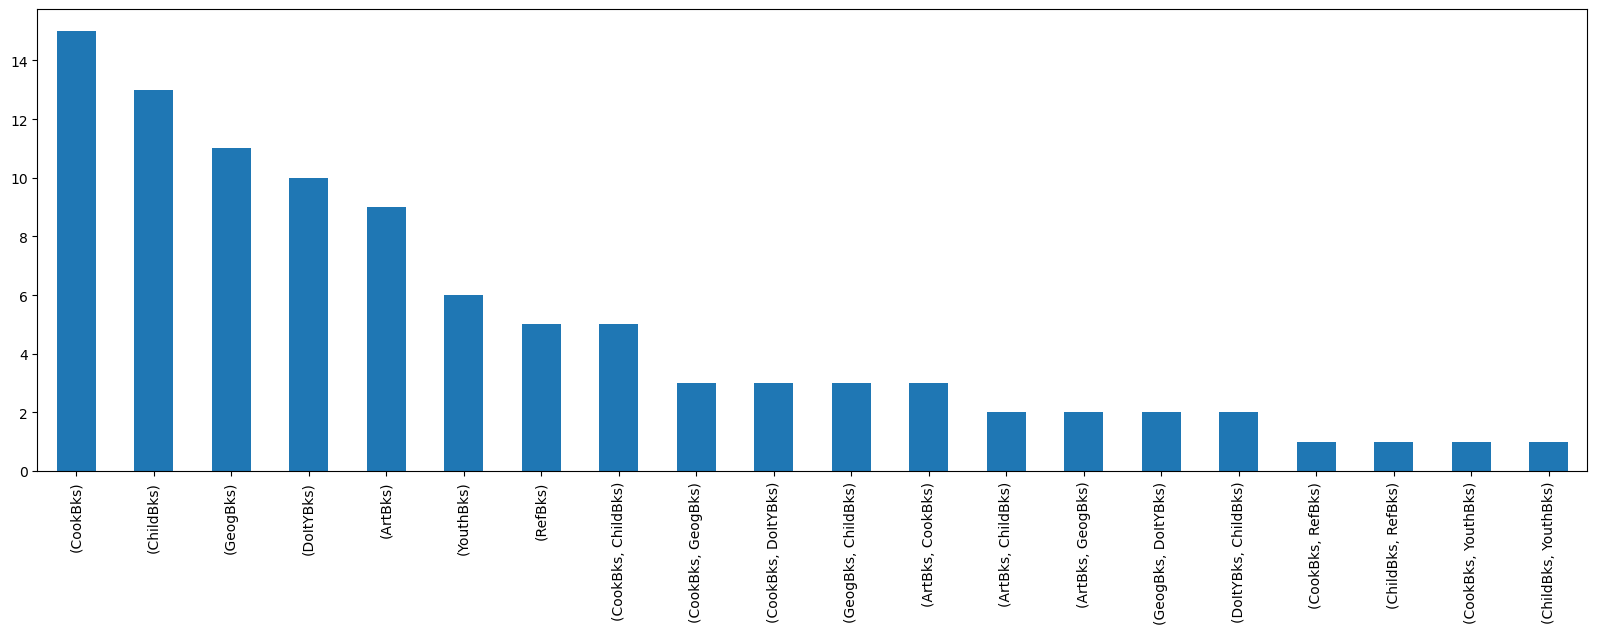

In [23]:
plt.figure(figsize=(20, 6))
pd.Series(rules['consequents']).value_counts().head(20).plot.bar()

<AxesSubplot:xlabel='support', ylabel='confidence'>

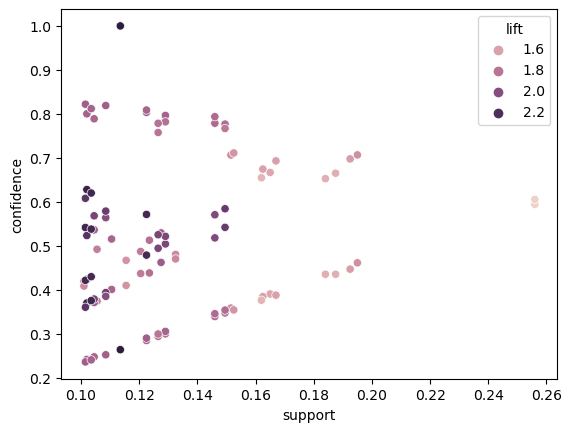

In [24]:
conf = rules['confidence']
supp = rules['support']
sns.scatterplot(supp, conf, hue = rules['lift'])